In [1]:
#Exploration des données 

In [110]:
"""
Import
"""
import os 
import pandas as pd
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt 
import requests

In [111]:
r = requests.get('https://api.tela-botanica.org/service:cel:CelWidgetExport/export?pays=FR%2CFX%2CGF%2CPF%2CTF&programme=tb_lichensgo&standard=1&debut=0&limite=20000&format=csv&colonnes=standardexport,auteur,avance,etendu,standard', auth=('user', 'pass'))

In [112]:
url = requests.get('https://api.tela-botanica.org/service:cel:CelWidgetExport/export?pays=FR%2CFX%2CGF%2CPF%2CTF&programme=tb_lichensgo&standard=1&debut=0&limite=20000&format=csv&colonnes=standardexport,auteur,avance,etendu,standard')

In [113]:
import pandas as pd
import requests
url = "https://api.tela-botanica.org/service:cel:CelWidgetExport/export?pays=FR%2CFX%2CGF%2CPF%2CTF&programme=tb_lichensgo&standard=1&debut=0&limite=20000&format=csv&colonnes=standardexport,auteur,avance,etendu,standard"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [114]:
df_copy = df.copy()

In [115]:
# Taille du Dataframe  2776 Lignes et 60 Colonnes
df_copy.shape

(2074, 60)

In [116]:
df.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Nom retenu,Numéro nomenclatural nom retenu,Famille,Référentiel taxonomique,Certitude,Type d'observation,...,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc,ext:com-arbres,ext:latitude-arbres,ext:longitude-arbres,ext:altitude-arbres
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,Celtis australis L. [1753],14954.0,NaN,bdtfx,certain,observation de terrain,...,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN,NaN,NaN,NaN,NaN
3,urn:lsid:tela-botanica.org:cel:3609320,3609320,Acer platanoides L. [1753],74934.0,Acer platanoides L. [1753],74934.0,Sapindaceae,bdtfx,certain,observation de terrain,...,1.238365,1.0,Avenue de Naugeat,Avenue de Naugeat,NaN,NaN,NaN,NaN,NaN,NaN
4,urn:lsid:tela-botanica.org:cel:3609321,3609321,Acer platanoides L. [1753],74934.0,Acer platanoides L. [1753],74934.0,Sapindaceae,bdtfx,certain,observation de terrain,...,1.238365,2.0,Avenue de Naugeat,Avenue de Naugeat,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
#Nombre de valeurs null par colonne 
df_copy.isnull().sum()

Identifiant unique                                                 0
Identifiant                                                        0
Espèce                                                             0
Numéro nomenclatural                                             274
Nom retenu                                                        13
Numéro nomenclatural nom retenu                                   13
Famille                                                         1028
Référentiel taxonomique                                          261
Certitude                                                          0
Type d'observation                                                 0
Source de la saisie                                                0
Spontanéité                                                        0
Latitude                                                           0
Longitude                                                          0
Référentiel Géographique          

In [118]:
#colonnes avec que les valeurs manquanets 
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df_copy)

Numéro nomenclatural => 274
Nom retenu => 13
Numéro nomenclatural nom retenu => 13
Famille => 1028
Référentiel taxonomique => 261
Identifiant Commune => 209
Floutage (niveau de localisation diffusé) => 46
Lieu-dit => 2074
Milieu => 2074
Notes => 1917
Mots Clés => 1386
Lien vers l'observation sur IdentiPlante => 2063
Image(s) => 2063
Cohérence entre la localité et les coordonnées GPS => 2074
Précision de la localisation => 2074
Station => 2074
Score IdentiPlante => 775
Abondance => 2074
Phénologie => 2074
Transmis => 2074
Observateur => 2065
Structure de l'observateur => 2074
Déterminateur => 2074
Source bibliographique => 2074
ext:altitude-releve => 2033
ext:circonference => 1815
ext:face-ombre => 1815
ext:latitude-releve => 1819
ext:longitude-releve => 1819
ext:num_arbre => 1815
ext:rue-arbres => 1831
ext:id_obs_arbre => 259
ext:loc-sur-tronc => 268
ext:com-arbres => 2061
ext:latitude-arbres => 2070
ext:longitude-arbres => 2070
ext:altitude-arbres => 2070


In [119]:
#Valeurs null 
def donnee_manquantes(df):
    '''prints out columns with missing values with its %'''
    for col in df_copy.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
donnee_manquantes(df_copy)

Numéro nomenclatural => 13.21%
Nom retenu => 0.63%
Numéro nomenclatural nom retenu => 0.63%
Famille => 49.57%
Référentiel taxonomique => 12.58%
Identifiant Commune => 10.08%
Floutage (niveau de localisation diffusé) => 2.22%
Lieu-dit => 100.0%
Milieu => 100.0%
Notes => 92.43%
Mots Clés => 66.83%
Lien vers l'observation sur IdentiPlante => 99.47%
Image(s) => 99.47%
Cohérence entre la localité et les coordonnées GPS => 100.0%
Précision de la localisation => 100.0%
Station => 100.0%
Score IdentiPlante => 37.37%
Abondance => 100.0%
Phénologie => 100.0%
Transmis => 100.0%
Observateur => 99.57%
Structure de l'observateur => 100.0%
Déterminateur => 100.0%
Source bibliographique => 100.0%
ext:altitude-releve => 98.02%
ext:circonference => 87.51%
ext:face-ombre => 87.51%
ext:latitude-releve => 87.7%
ext:longitude-releve => 87.7%
ext:num_arbre => 87.51%
ext:rue-arbres => 88.28%
ext:id_obs_arbre => 12.49%
ext:loc-sur-tronc => 12.92%
ext:com-arbres => 99.37%
ext:latitude-arbres => 99.81%
ext:longi

<AxesSubplot:>

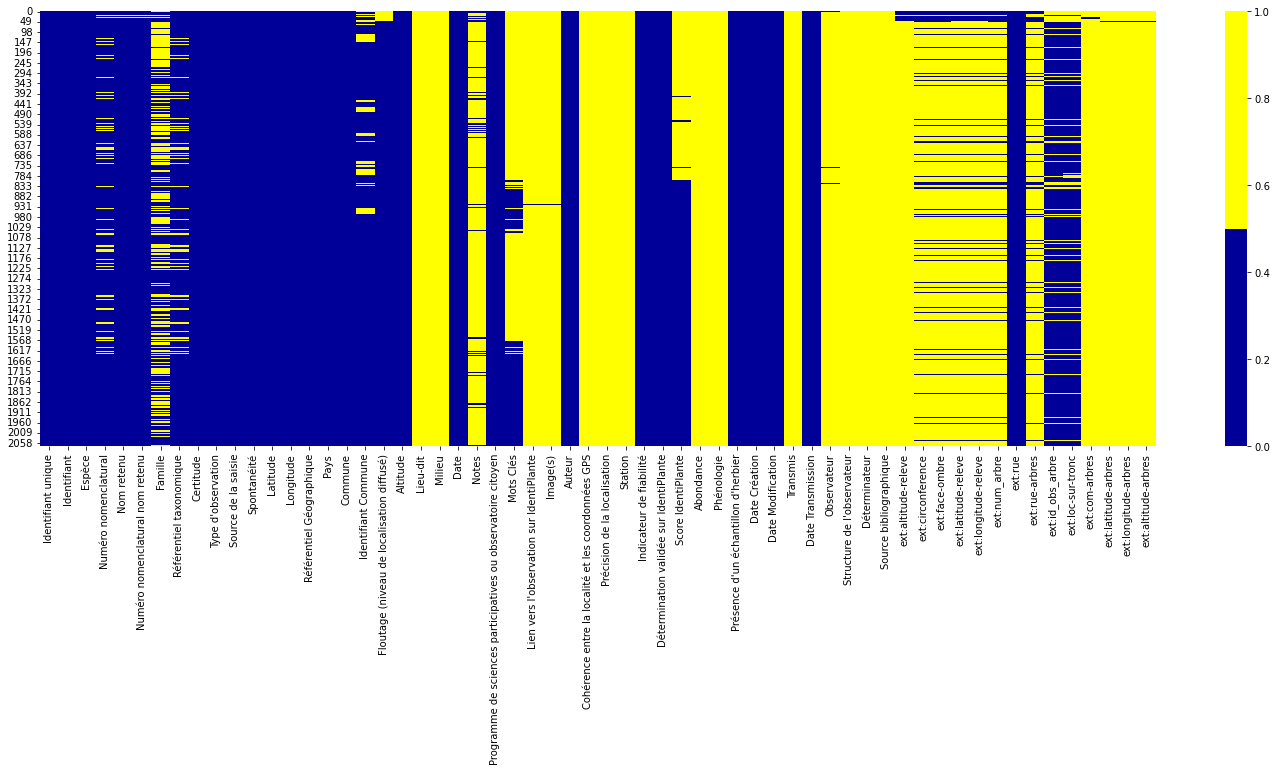

In [120]:
#carte de chaleurs des valeurs null 
fig, ax = plt.subplots(figsize=(25,8))
cols = df_copy.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [121]:
# Suppression des colonnes non nécessaires

colonnes_a_sup = ["Lieu-dit", "Milieu", "Notes", "Lien vers l'observation sur IdentiPlante", "Image(s)", "Cohérence entre la localité et les coordonnées GPS", "Précision de la localisation",
                 "Station", "Abondance", "Phénologie", "Observateur", "Structure de l'observateur","Déterminateur","Source bibliographique", "ext:altitude-releve",
                 "ext:circonference", "ext:face-ombre", "ext:com-arbres","ext:latitude-arbres","ext:longitude-arbres","ext:altitude-arbres", "Nom retenu", "Numéro nomenclatural nom retenu",
                 "Certitude", "Transmis", "Source de la saisie", "Mots Clés","Indicateur de fiabilité",  "Score IdentiPlante", "Abondance", "Phénologie",
                 "Présence d'un échantillon d'herbier" ,"Date Transmission"]

df_copy.drop(colonnes_a_sup, axis = 1, inplace = True)
    

In [122]:
df_copy.shape

(2074, 29)

In [123]:
missing_cols(df_copy)

Numéro nomenclatural => 274
Famille => 1028
Référentiel taxonomique => 261
Identifiant Commune => 209
Floutage (niveau de localisation diffusé) => 46
ext:latitude-releve => 1819
ext:longitude-releve => 1819
ext:num_arbre => 1815
ext:rue-arbres => 1831
ext:id_obs_arbre => 259
ext:loc-sur-tronc => 268


In [86]:
df_copy.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Date Création,Date Modification,Transmis,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55616,2.97596,...,2019-07-01 11:11:06,2020-03-23 14:30:29,NaN,42.551862,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55609,2.97587,...,2019-07-01 11:11:06,2020-03-23 14:31:10,NaN,42.551862,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,NaN,bdtfx,observation de terrain,0,42.55600,2.97580,...,2019-07-01 11:11:07,2020-03-23 14:27:20,NaN,42.551862,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
3,urn:lsid:tela-botanica.org:cel:3609320,3609320,Acer platanoides L. [1753],74934.0,Sapindaceae,bdtfx,observation de terrain,1,45.82575,1.23837,...,2019-07-30 18:10:01,2019-08-10 19:38:39,NaN,45.826467,1.238365,1.0,Avenue de Naugeat,Avenue de Naugeat,NaN,NaN
4,urn:lsid:tela-botanica.org:cel:3609321,3609321,Acer platanoides L. [1753],74934.0,Sapindaceae,bdtfx,observation de terrain,1,45.82568,1.23840,...,2019-07-30 18:10:01,2019-08-10 19:39:35,NaN,45.826467,1.238365,2.0,Avenue de Naugeat,Avenue de Naugeat,NaN,NaN


In [87]:
# Après avoir supprimé les colonnes nécessaires, nous avons maintenant que 39 colonnes
df_copy.shape

(2074, 30)

<AxesSubplot:>

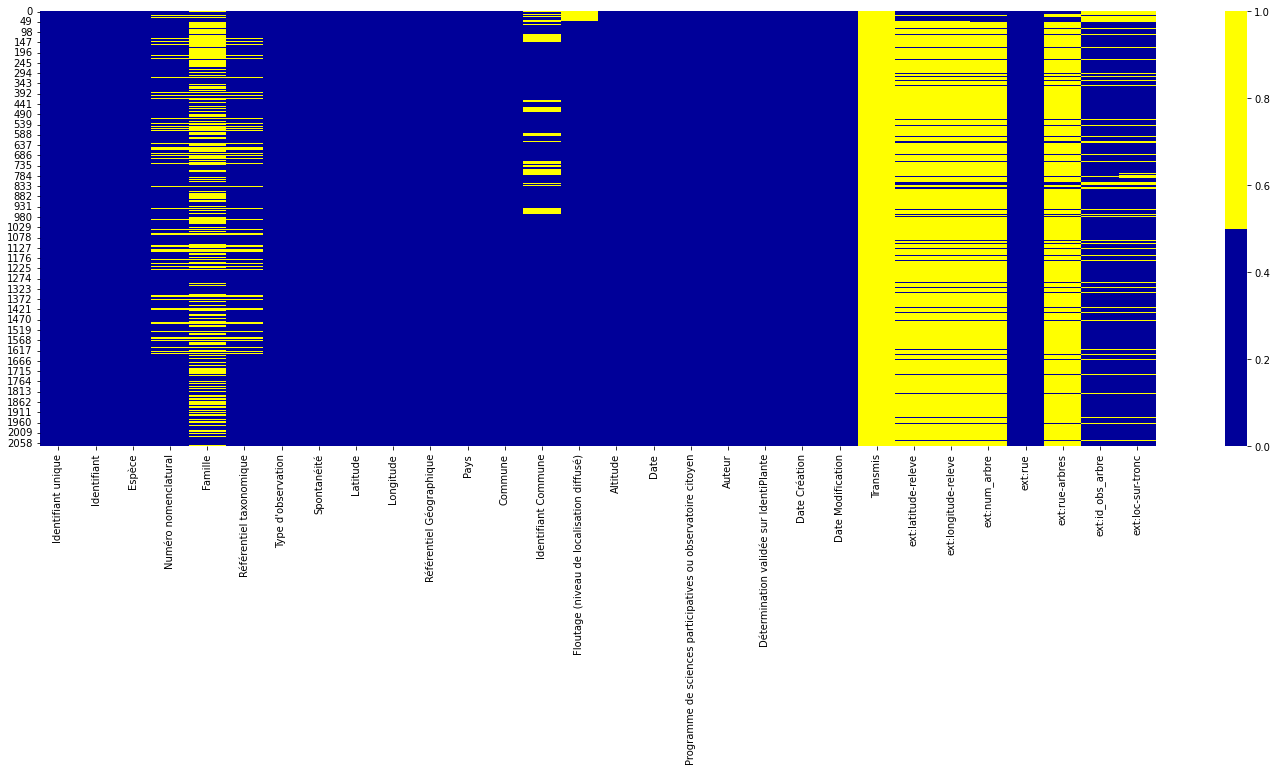

In [88]:
fig, ax = plt.subplots(figsize=(25,8))
cols = df_copy.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))


In [89]:
#convertir la colonne Identifiant commune d'abord en float avec la fonction to_numeric. 
df_copy["Identifiant Commune" ] = df_copy['Identifiant Commune'].astype(str)

In [90]:
donnee_manquantes(df_copy)

Numéro nomenclatural => 13.21%
Famille => 49.57%
Référentiel taxonomique => 12.58%
Floutage (niveau de localisation diffusé) => 2.22%
Transmis => 100.0%
ext:latitude-releve => 87.7%
ext:longitude-releve => 87.7%
ext:num_arbre => 87.51%
ext:rue-arbres => 88.28%
ext:id_obs_arbre => 12.49%
ext:loc-sur-tronc => 12.92%


In [91]:
df_copy.dtypes

Identifiant unique                                               object
Identifiant                                                       int64
Espèce                                                           object
Numéro nomenclatural                                            float64
Famille                                                          object
Référentiel taxonomique                                          object
Type d'observation                                               object
Spontanéité                                                       int64
Latitude                                                        float64
Longitude                                                       float64
Référentiel Géographique                                         object
Pays                                                             object
Commune                                                          object
Identifiant Commune                                             

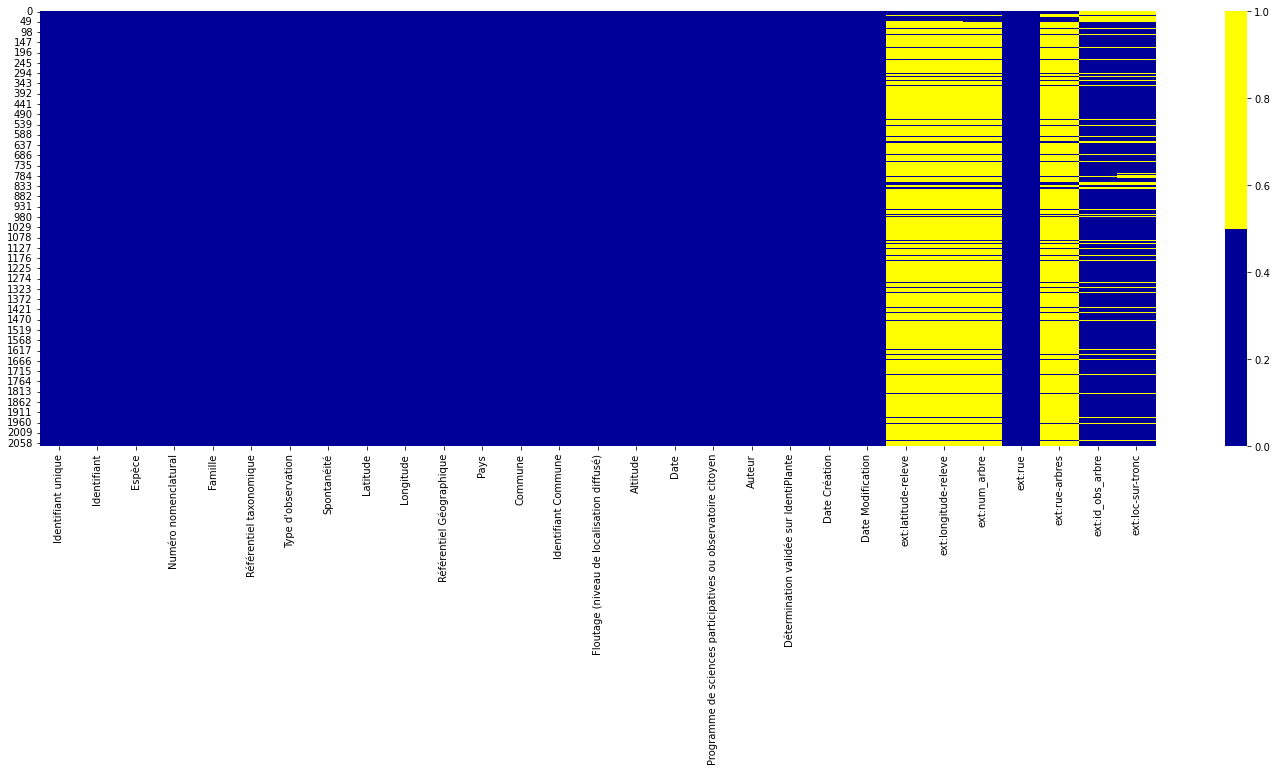

In [124]:
# Traitement des valeurs manquantes dans le dataFrame. 
df_copy.Famille = df_copy["Famille"].fillna("Null")
df_copy["Référentiel taxonomique"] = df_copy["Référentiel taxonomique"].fillna("Inconnu")
df_copy["Identifiant Commune"] = df_copy["Identifiant Commune"].fillna("Inconnu").astype(str)
df_copy["Identifiant"] = df_copy["Identifiant"].astype(str)
df_copy["Numéro nomenclatural"] = df_copy["Numéro nomenclatural"].fillna("Inconnu").astype(str)
df_copy["Espèce"] = df_copy["Espèce"].fillna("Null")
df_copy["Floutage (niveau de localisation diffusé)"] = df_copy["Floutage (niveau de localisation diffusé)"].fillna("Null")
df_copy["ext:loc-sur-tronc"] = df_copy["ext:loc-sur-tronc"].str.split(";")
fig, ax = plt.subplots(figsize=(25,8))
cols = df_copy.columns[:] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_copy[cols].isnull(), cmap=sns.color_palette(colours))
df_copy.to_csv("df_copyClean3.csv")


In [127]:
df_copy.head()

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Détermination validée sur IdentiPlante,Date Création,Date Modification,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc
0,urn:lsid:tela-botanica.org:cel:3601640,3601640,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55616,2.97596,...,0,2019-07-01 11:11:06,2020-03-23 14:30:29,42.551862,2.972345,1.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
1,urn:lsid:tela-botanica.org:cel:3601641,3601641,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55609,2.97587,...,0,2019-07-01 11:11:06,2020-03-23 14:31:10,42.551862,2.972345,2.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
2,urn:lsid:tela-botanica.org:cel:3601642,3601642,Celtis australis L. [1753],14954.0,Null,bdtfx,observation de terrain,0,42.55600,2.97580,...,0,2019-07-01 11:11:07,2020-03-23 14:27:20,42.551862,2.972345,3.0,Rue de Taxo,Camí del Mas Nou,NaN,NaN
3,urn:lsid:tela-botanica.org:cel:3609320,3609320,Acer platanoides L. [1753],74934.0,Sapindaceae,bdtfx,observation de terrain,1,45.82575,1.23837,...,0,2019-07-30 18:10:01,2019-08-10 19:38:39,45.826467,1.238365,1.0,Avenue de Naugeat,Avenue de Naugeat,NaN,NaN
4,urn:lsid:tela-botanica.org:cel:3609321,3609321,Acer platanoides L. [1753],74934.0,Sapindaceae,bdtfx,observation de terrain,1,45.82568,1.23840,...,0,2019-07-30 18:10:01,2019-08-10 19:39:35,45.826467,1.238365,2.0,Avenue de Naugeat,Avenue de Naugeat,NaN,NaN


In [128]:
df_copy["ext:loc-sur-tronc"] = df_copy["ext:loc-sur-tronc"].fillna("Null").astype(str)

,Identifiant unique,Identifiant,Espèce,Numéro nomenclatural,Famille,Référentiel taxonomique,Type d'observation,Spontanéité,Latitude,Longitude,...,Détermination validée sur IdentiPlante,Date Création,Date Modification,ext:latitude-releve,ext:longitude-releve,ext:num_arbre,ext:rue,ext:rue-arbres,ext:id_obs_arbre,ext:loc-sur-tronc
2069,urn:lsid:tela-botanica.org:cel:3810255,3810255,Physcia adscendens/tenella,196232.0,Null,taxreflich,observation de terrain,1,45.74963,3.0969,...,0,2021-11-30 17:54:21,2021-11-30 17:54:21,NaN,NaN,NaN,Rue de la Mourette,NaN,3810234.0,"['n1', 'n2', 'n3', 'n4', 'n5', 'o1', 'o2', 'o3..."
2070,urn:lsid:tela-botanica.org:cel:3810256,3810256,autre lichen foliacé,0.0,Null,taxreflich,observation de terrain,1,45.74963,3.0969,...,0,2021-11-30 17:54:22,2021-11-30 17:54:22,NaN,NaN,NaN,Rue de la Mourette,NaN,3810234.0,"['n1', 'n2', 'n3', 'n4', 'n5', 's1', 'o1', 's2..."
2071,urn:lsid:tela-botanica.org:cel:3810257,3810257,autre lichen foliacé,0.0,Null,taxreflich,observation de terrain,1,45.74963,3.0969,...,0,2021-11-30 17:54:22,2021-11-30 17:54:22,NaN,NaN,NaN,Rue de la Mourette,NaN,3810234.0,"['s1', 's2', 's3', 's4', 's5', 'n1', 'o1', 'n2..."
2072,urn:lsid:tela-botanica.org:cel:3810258,3810258,Phaeophyscia orbicularis (Neck.) Moberg [1977],59961.0,Physciaceae,taxreflich,observation de terrain,1,45.74963,3.0969,...,0,2021-11-30 17:54:22,2021-11-30 17:54:22,NaN,NaN,NaN,Rue de la Mourette,NaN,3810234.0,"['n1', 'n2', 'n3', 'n4', 'n5', 's1', 's2', 's3..."
2073,urn:lsid:tela-botanica.org:cel:3810259,3810259,Punctelia sp.,652928.0,Null,taxreflich,observation de terrain,1,45.74963,3.0969,...,0,2021-11-30 17:54:23,2021-11-30 17:54:23,NaN,NaN,NaN,Rue de la Mourette,NaN,3810234.0,"['n1', '']"


In [103]:
#Sélectionner les arbres et les exporter vers une tables uniques 
filtr_arbre_saisi =  df_copy[df_copy['ext:latitude-releve'].notnull()]
arbre_saisi = filtr_arbre_saisi[["Identifiant","Latitude","Longitude", "Espèce","Famille","Date","Pays","Commune","ext:num_arbre"]] 
arbre_saisi.rename(columns = {'Espèce':'Espece_arbre',
                              'Identifiant' : 'Id_arbre'}, inplace = True)

arbre_saisi.to_csv("table_arbre.csv", index=False)

#Séléctionner les lichens et les exporter vers une table unique
filtr_lichens_saisi = df_copy[df_copy["ext:latitude-releve"].isnull()]
lichens_saisi = filtr_lichens_saisi [["Identifiant", "Espèce","Date", "Latitude", "Longitude","ext:id_obs_arbre"]]
lichens_saidi = filtr_lichens_saisi.rename(columns = {'Espèce' : 'Espece_lichens',
                                                      'Identifiant' : 'Id_lichens'}, inplace = True)
lichens_saisi.to_csv("table_lichens.csv", index=False)



In [132]:
df_copy.dtypes

Identifiant unique                                               object
Identifiant                                                      object
Espèce                                                           object
Numéro nomenclatural                                             object
Famille                                                          object
Référentiel taxonomique                                          object
Type d'observation                                               object
Spontanéité                                                       int64
Latitude                                                        float64
Longitude                                                       float64
Référentiel Géographique                                         object
Pays                                                             object
Commune                                                          object
Identifiant Commune                                             

In [69]:
df_copy["ext:loc-sur-tronc"] = df_copy["ext:loc-sur-tronc"].str.split(";")

In [70]:
df_copy["ext:loc-sur-tronc"]

0                                                  [Null]
1                                                  [Null]
2                                                  [Null]
3                                                  [Null]
4                                                  [Null]
                              ...                        
2069           [n1, n2, n3, n4, n5, o1, o2, o3, o4, o5, ]
2070    [n1, n2, n3, n4, n5, s1, o1, s2, o2, s3, o3, s...
2071       [s1, s2, s3, s4, s5, n1, o1, n2, n3, n4, o5, ]
2072    [n1, n2, n3, n4, n5, s1, s2, s3, s4, s5, o1, o...
2073                                               [n1, ]
Name: ext:loc-sur-tronc, Length: 2074, dtype: object

In [133]:
def carteChaleur(df):
    fig, ax = plt.subplots(figsize=(25, 8))
    cols = df_copy.columns[:]
    colours = ['#000099', '#ffff00']  # specify the colours - yellow is missing. blue is not missing.
    sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

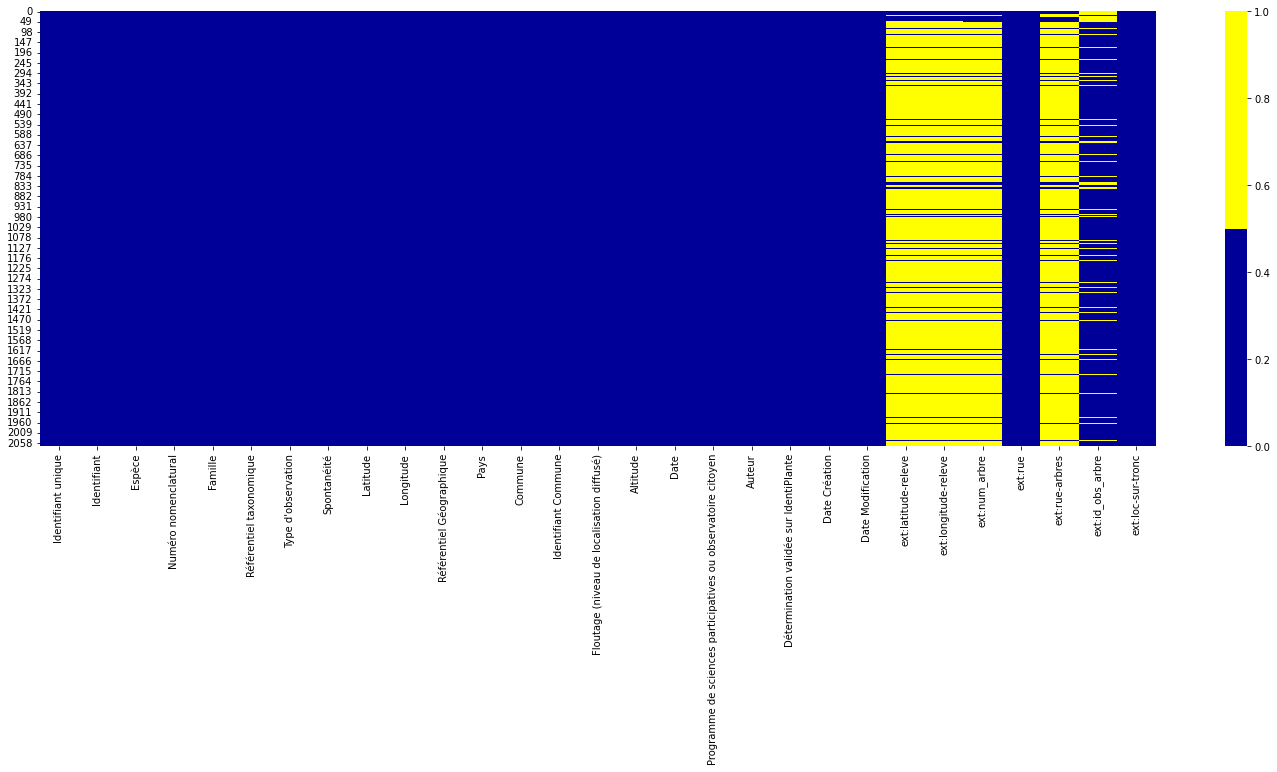

In [134]:
carteChaleur(df_copy)